In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, ClassicalRegister, QuantumRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
# provider = IBMQ.load_account()

IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'

In [2]:
import math
from math import pi
qr = QuantumRegister(4,'q')
qc = QuantumCircuit(4,4)


In [3]:
num = 3 # main큐비트 3개 이용
user_input = 3 # input값
# input값을 2진수로 표현
in_list = [int((int(user_input/2)/2)%2),int((user_input/2)%2),(user_input%2)] 
def cccx(qc, qrs, angle=pi / 4):
    #https://github.com/Qiskit/qiskit-aqua/blob/master/qiskit/aqua/circuits/gates/multi_control_toffoli_gate.py
    # controlled-V
    qc.h(qrs[3])
    qc.cu1(-angle, qrs[0], qrs[3])
    qc.h(qrs[3])
    # ------------
    qc.cx(qrs[0], qrs[1])
    # controlled-Vdag
    qc.h(qrs[3])
    qc.cu1(angle, qrs[1], qrs[3])
    qc.h(qrs[3])
    # ---------------
    qc.cx(qrs[0], qrs[1])
    # controlled-V
    qc.h(qrs[3])
    qc.cu1(-angle, qrs[1], qrs[3])
    qc.h(qrs[3])
    # ------------
    qc.cx(qrs[1], qrs[2])
    # controlled-Vdag
    qc.h(qrs[3])
    qc.cu1(angle, qrs[2], qrs[3])
    qc.h(qrs[3])
    # ---------------
    qc.cx(qrs[0], qrs[2])
    # controlled-V
    qc.h(qrs[3])
    qc.cu1(-angle, qrs[2], qrs[3])
    qc.h(qrs[3])
    # ------------
    qc.cx(qrs[1], qrs[2])
    # controlled-Vdag
    qc.h(qrs[3])
    qc.cu1(angle, qrs[2], qrs[3])
    qc.h(qrs[3])
    # ---------------
    qc.cx(qrs[0], qrs[2])
    # controlled-V
    qc.h(qrs[3])
    qc.cu1(-angle, qrs[2], qrs[3])
    qc.h(qrs[3])

def oracle():
    for i in range(num):
        if in_list[i] == 0:
            qc.x(i)
        else :
            qc.barrier(i)
    qc.barrier(3)
    cccx(qc,qr)
    qc.barrier(0,1,2,3)
    for i in range(num):
        if in_list[i] == 0:
            qc.x(i)
        else :
            qc.barrier(i)
    
def diffusionOperator():
    for i in range(num):
        qc.h(i)
    for i in range(num):
        qc.x(i)
    qc.h(num-1)
    qc.ccx(0,1,2)
    qc.h(num-1)
    qc.barrier(0,1)
    for i in range(num):
        qc.x(i)
    for i in range(num):
        qc.h(i)

## main
qc.x(3) # 보조큐비트 1로
qc.barrier(0,1,2,3)

for i in range(num+1): # 주 큐비트들 H적용
    qc.h(i)
qc.barrier(0,1,2,3)
rotation = int(math.sqrt(2**num))

for i in range(rotation):  # 반복 시행
    oracle()
    qc.barrier(0,1,2,3) # Oracle End
    diffusionOperator()
    qc.barrier(0,1,2,3) # diffusionOperator End

qc.h(3)
qc.barrier(0,1,2)
qc.measure([0,1,2,3],[0,1,2,3])

qc.draw()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_la

░ ┌───┐ ░ ┌───┐                                                  »
q_0: ──────░─┤ H ├─░─┤ X ├──────■───────■───────────────■───────────────────»
           ░ ├───┤ ░ └─░─┘      │     ┌─┴─┐           ┌─┴─┐                 »
q_1: ──────░─┤ H ├─░───░────────┼─────┤ X ├──────■────┤ X ├──────■───────■──»
           ░ ├───┤ ░   ░        │     └───┘      │    └───┘      │     ┌─┴─┐»
q_2: ──────░─┤ H ├─░───░────────┼────────────────┼───────────────┼─────┤ X ├»
     ┌───┐ ░ ├───┤ ░   ░  ┌───┐ │-π/4 ┌───┐┌───┐ │π/4 ┌───┐┌───┐ │-π/4 ├───┤»
q_3: ┤ X ├─░─┤ H ├─░───░──┤ H ├─■─────┤ H ├┤ H ├─■────┤ H ├┤ H ├─■─────┤ H ├»
     └───┘ ░ └───┘ ░   ░  └───┘       └───┘└───┘      └───┘└───┘       └───┘»
c: 4/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                                        ░ »
«q_0: ─────────────■────────────────────────────────■────────────────────░─»
«                  │                                │                    ░ »
«q_1: ─────────────┼────────────────■───────────────┼────────────────────░─»
«                ┌─┴─┐            ┌─┴─┐           ┌─┴─┐                  ░ »
«q_2: ──────■────┤ X ├──────■─────┤ X ├──────■────┤ X ├──────■───────────░─»
«     ┌───┐ │π/4 ├───┤┌───┐ │-π/4 ├───┤┌───┐ │π/4 ├───┤┌───┐ │-π/4 ┌───┐ ░ »
«q_3: ┤ H ├─■────┤ H ├┤ H ├─■─────┤ H ├┤ H ├─■────┤ H ├┤ H ├─■─────┤ H ├─░─»
«     └───┘      └───┘└───┘       └───┘└───┘      └───┘└───┘       └───┘ ░ »
«c: 4/═════════════════════════════════════════════════════════════════════»
«                                                                          »
«     ┌───┐ ░ ┌───┐┌───┐            ░  ┌───┐┌───┐ ░ ┌───┐                      »
«q_0: ┤ X ├─░─┤ H ├┤ X ├───────■────░──┤ X ├┤ H ├─░─┤ X ├──────■───────■───────»
«     └─░─┘ ░ ├───┤├───┤       │    ░  ├───┤├───┤ ░ └─░─┘      │     ┌─┴─┐     »
«q_1: ──░───░─┤ H ├┤ X ├───────■────░──┤ X ├┤ H ├─░───░────────┼─────┤ X ├─────»
«       ░   ░ ├───┤├───┤┌───┐┌─┴─┐┌───┐├───┤├───┤ ░   ░        │     └───┘     »
«q_2: ──░───░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░───░────────┼───────────────»
«       ░   ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░   ░  ┌───┐ │-π/4 ┌───┐┌───┐»
«q_3: ──────░─────────────────────────────────────░───░──┤ H ├─■─────┤ H ├┤ H ├»
«           ░                                     ░   ░  └───┘       └───┘└───┘»
«c: 4/═════════════════════════════════════════════════════════════════════════»
«                                                                              »
«                                                                             »
«q_0: ────────■────────────────────────────────■──────────────────────────────»
«           ┌─┴─┐                              │                              »
«q_1: ─■────┤ X ├──────■───────■───────────────┼────────────────■─────────────»
«      │    └───┘      │     ┌─┴─┐           ┌─┴─┐            ┌─┴─┐           »
«q_2: ─┼───────────────┼─────┤ X ├──────■────┤ X ├──────■─────┤ X ├──────■────»
«      │π/4 ┌───┐┌───┐ │-π/4 ├───┤┌───┐ │π/4 ├───┤┌───┐ │-π/4 ├───┤┌───┐ │π/4 »
«q_3: ─■────┤ H ├┤ H ├─■─────┤ H ├┤ H ├─■────┤ H ├┤ H ├─■─────┤ H ├┤ H ├─■────»
«           └───┘└───┘       └───┘└───┘      └───┘└───┘       └───┘└───┘      »
«c: 4/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«                            ░ ┌───┐ ░ ┌───┐┌───┐            ░  ┌───┐┌───┐ ░ »
«q_0: ──■────────────────────░─┤ X ├─░─┤ H ├┤ X ├───────■────░──┤ X ├┤ H ├─░─»
«       │                    ░ └─░─┘ ░ ├───┤├───┤       │    ░  ├───┤├───┤ ░ »
«q_1: ──┼────────────────────░───░───░─┤ H ├┤ X ├───────■────░──┤ X ├┤ H ├─░─»
«     ┌─┴─┐                  ░   ░   ░ ├───┤├───┤┌───┐┌─┴─┐┌───┐├───┤├───┤ ░ »
«q_2: ┤ X ├──────■───────────░───░───░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─»
«     ├───┤┌───┐ │-π/4 ┌───┐ ░   ░   ░ └───┘└───┘└───┘└───┘└─

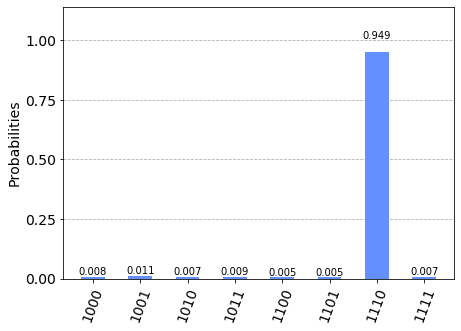

In [4]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)